In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [38]:
#Load dataset and perform initial checks

df=pd.read_csv('climate_action_data.csv')
df.head()
df.describe()
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


In [4]:
#Checking for empty cells/values
df.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [7]:
#Handling missing values
numeric_col=['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']
for col in numeric_col:
    if col in df.columns:
       df[col]=pd.to_numeric(df[col], errors='coerce')
       df[col].fillna(df[col].median(), inplace=True)
       
       
#For categorical columns
categorical_col =['Crop_Type']
for col in categorical_col:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)  
        
#Check again for missing values
df.isnull().sum()           

C:\Users\Humphrey Junior\AppData\Local\Temp\ipykernel_28712\1368312997.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Humphrey Junior\AppData\Local\Temp\ipykernel_28712\1368312997.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [8]:
#Data in wrong format
#convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#check again for any remaining missing values
df.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [9]:
#Wrong data types(Avoiding deviations)
price_col=['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']
for col in price_col:
    if col in df.columns:
       mean=df[col].mean()
       std_dev=df[col].std()
       df[col]=np.where((df[col] < (mean - 3 * std_dev)) | (df[col] > (mean + 3 * std_dev)), np.nan, df[col])
       #Fill remaining NaN values with median
       df[col].fillna(df[col].median(), inplace=True)

C:\Users\Humphrey Junior\AppData\Local\Temp\ipykernel_28712\2536072200.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [27]:
#Duplicates
#check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

#check for duplicate dates
duplicate_dates = df['Date'].duplicated().sum()
print(f"Number of duplicate dates: {duplicate_dates}")

#Remove duplicate dates
df = df.drop_duplicates(subset='Date', keep='first')

df.shape
#Check again for duplicates
duplicates_after = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicates_after}")

print(df.isnull().sum())
#Identify the particular row with a missing date
missing_date_row = df[df['Date'].isnull()]
print("Row with missing date:")
print(missing_date_row)
#Remove rows with missing dates
df = df.dropna(subset=['Date'])

print(df.isnull().sum())


Number of duplicate rows: 0
Number of duplicate dates: 0
Number of duplicate rows after removal: 0
Sensor_ID                        0
Date                             1
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64
Row with missing date:
    Sensor_ID Date  Soil_Moisture(%)  Soil_pH  Temperature(C)  Humidity(%)  \
449  SEN-1449  NaN             15.85     6.66            19.4         51.5   

    Crop_Type  Fertilizer_Recommended(kg/ha)  Irrigation_Recommended(mm)  \
449  Tomatoes                           72.2                        23.8   

    Drone_Image_ID  
449       IMG-2449  
Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)         

In [28]:
#Final cleaned dataset
df.info()
print(df.describe())
print(df.head())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 798
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sensor_ID                      798 non-null    object 
 1   Date                           798 non-null    object 
 2   Soil_Moisture(%)               798 non-null    float64
 3   Soil_pH                        798 non-null    float64
 4   Temperature(C)                 798 non-null    float64
 5   Humidity(%)                    798 non-null    float64
 6   Crop_Type                      798 non-null    object 
 7   Fertilizer_Recommended(kg/ha)  798 non-null    float64
 8   Irrigation_Recommended(mm)     798 non-null    float64
 9   Drone_Image_ID                 798 non-null    object 
dtypes: float64(6), object(4)
memory usage: 68.6+ KB
       Soil_Moisture(%)     Soil_pH  Temperature(C)  Humidity(%)  \
count        798.000000  798.000000      798.000000   798.0

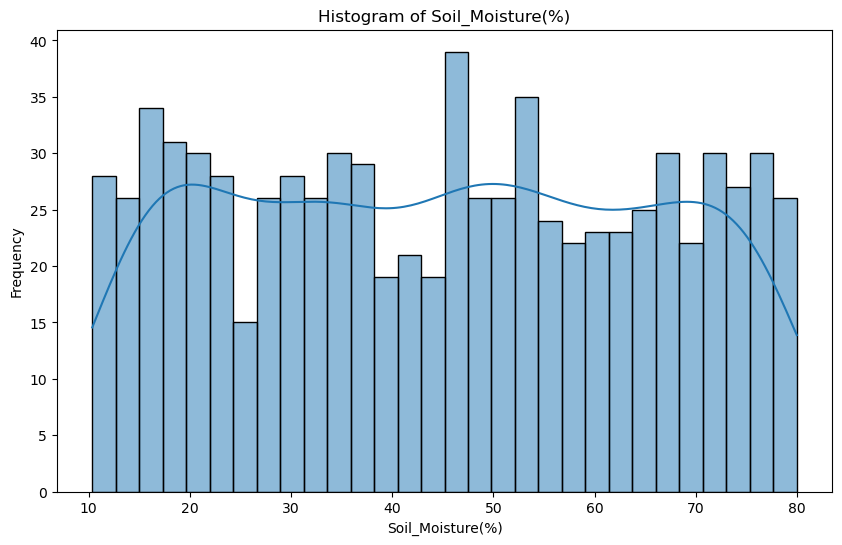

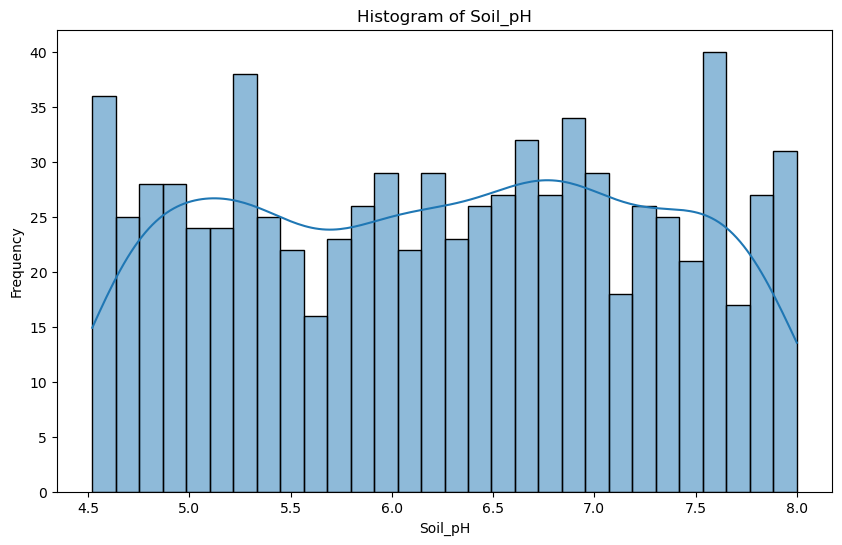

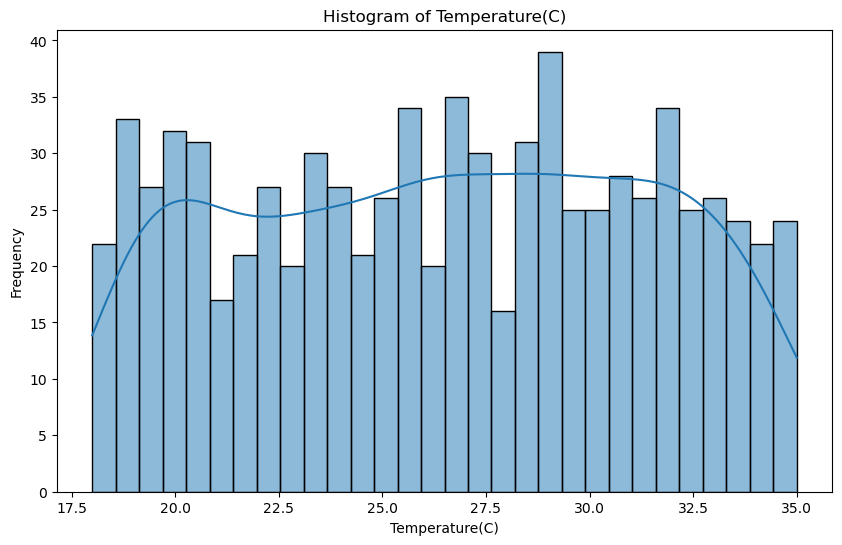

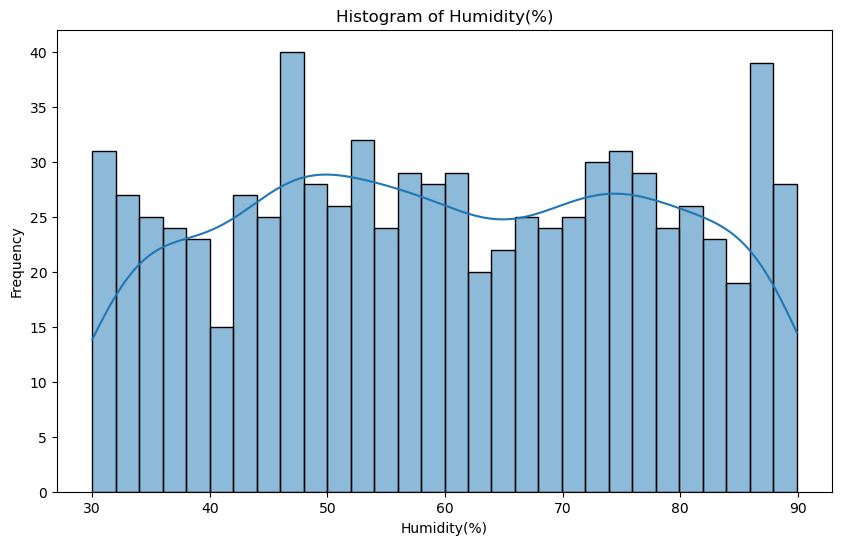

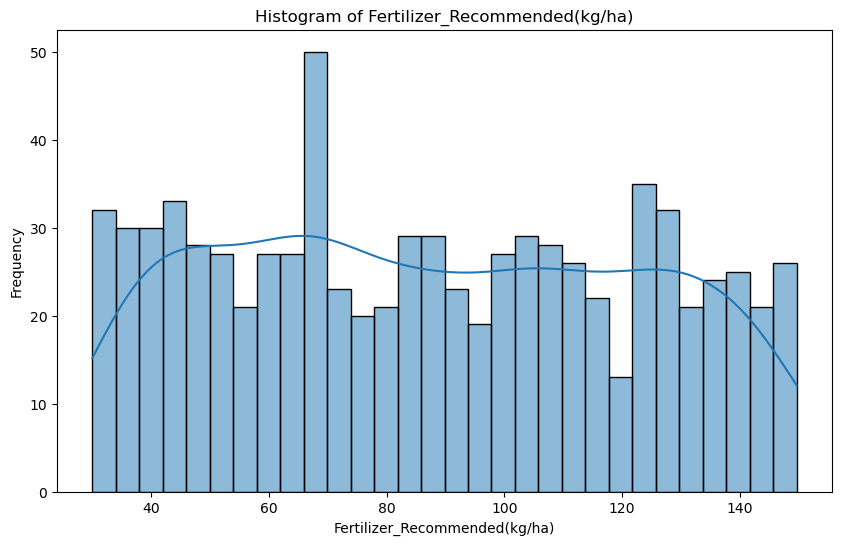

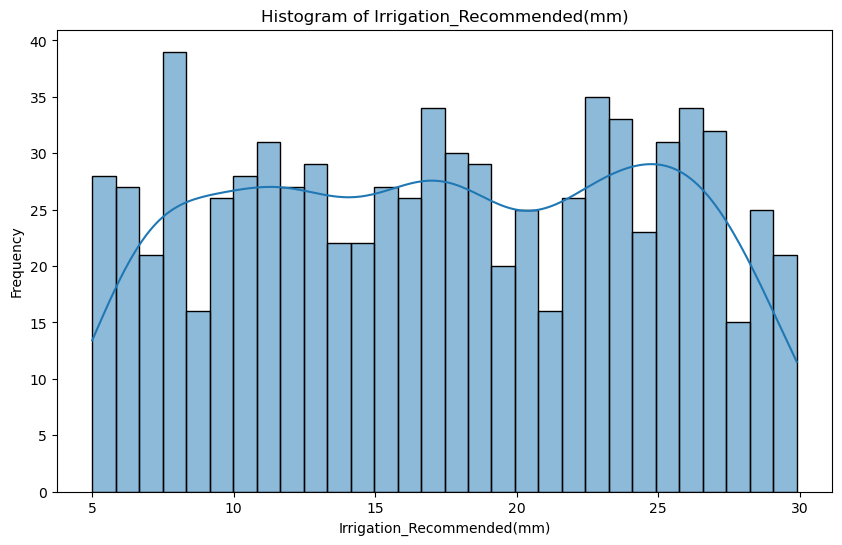

In [29]:
#Analysis and Visualization
#Histogram for numeric columns
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    
    

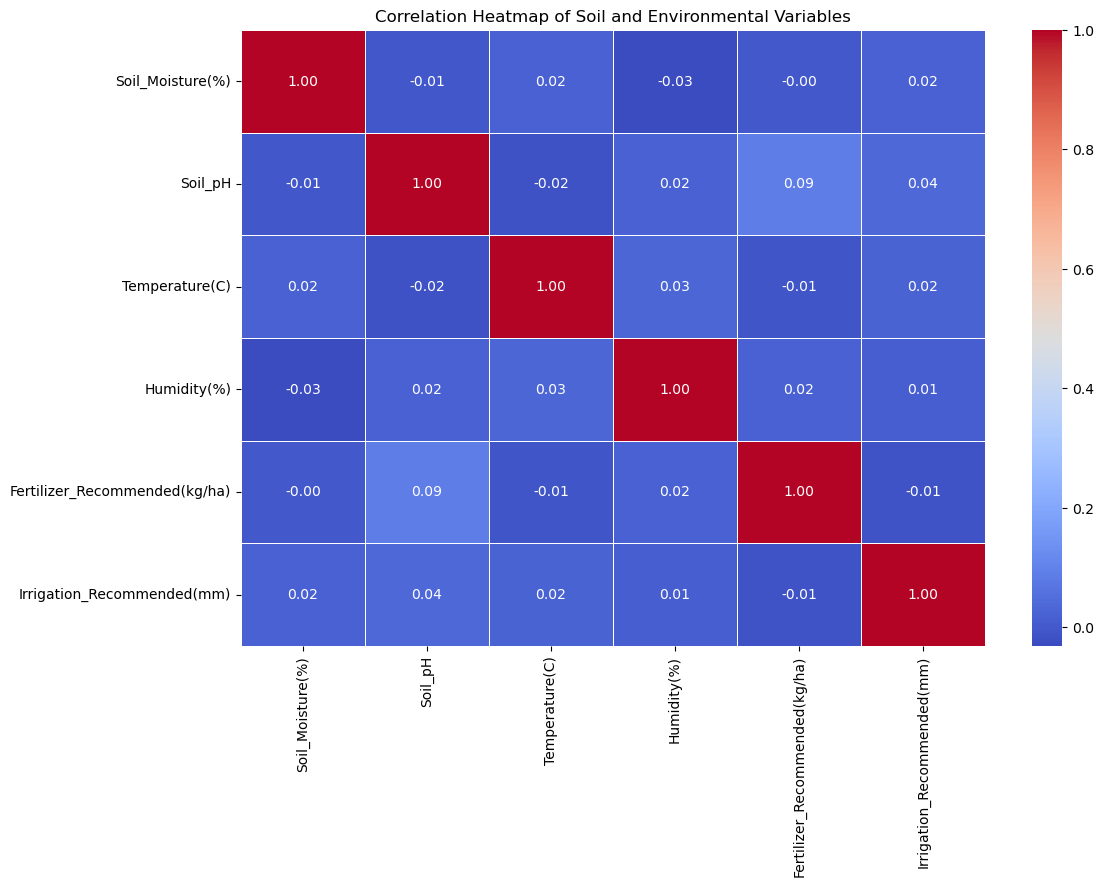

In [30]:
#correlation heatmap
#correlation hratmap to examine soil and environmental variables
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Soil and Environmental Variables')
plt.show()

In [32]:
#Results from the analysis
#variable that most influence fertilizer recommendation
most_influential = correlation_matrix['Fertilizer_Recommended(kg/ha)'].abs().sort_values(ascending=False)
print("Variables that most influence fertilizer recommendation:")
print(most_influential)

#crop type with highest average soil moisture
highest_avg_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
print("\nCrop type with highest average soil moisture:")
print(highest_avg_moisture)

#Appropriate irrigation adjustments for crops experiencing avaerage temperature above 30°C
high_temp_crops = df[df['Temperature(C)'] > 30]
high_temp_irrigation = high_temp_crops.groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean().sort_values(ascending=False)   
print("\nCrops experiencing average temperature above 30°C and their irrigation recommendations:")
print(high_temp_irrigation)

Variables that most influence fertilizer recommendation:
Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.085570
Humidity(%)                      0.017062
Irrigation_Recommended(mm)       0.012448
Temperature(C)                   0.008140
Soil_Moisture(%)                 0.001722
Name: Fertilizer_Recommended(kg/ha), dtype: float64

Crop type with highest average soil moisture:
Crop_Type
Wheat       47.356449
Maize       44.953581
Beans       44.337781
Tomatoes    44.185392
Lettuce     42.932100
Name: Soil_Moisture(%), dtype: float64

Crops experiencing average temperature above 30°C and their irrigation recommendations:
Crop_Type
Tomatoes    18.919565
Wheat       18.645946
Beans       17.857692
Maize       16.625455
Lettuce     16.297297
Name: Irrigation_Recommended(mm), dtype: float64


In [37]:
#Export cleaned data
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)
#Test the cleaned data
#Load the cleaned data to verify
df=pd.read_csv('cleaned_precision_agriculture_data.csv')

print(df.isnull().sum())

df.shape
# df.describe()



Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


(798, 10)